In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import string
plt.style.use("seaborn")
import plotly.express as px
import warnings
warnings.filterwarnings(action = "ignore")
from ydata_profiling import ProfileReport

C:\Users\jijin\AppData\Local\Temp\ipykernel_18020\3725056146.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
data = pd.ExcelFile("Omnify-Analyst-Intership-Task.xlsx")
google_data = pd.read_excel(data,"Google Ads Data",parse_dates=True)
site_data = pd.read_excel(data,"Listing Site Data",parse_dates=True)

In [3]:
google_data.head()

Week                  Campaign                            Ad group  \
0 2021-01-25       EK_Generic_Swimming       Pool_Reservation_System_Exact   
1 2021-01-25       EK_Generic_Swimming              Pool_Booking_App_Exact   
2 2021-01-25  EK_Generic_Quad-Tok_Yoga  Yoga_Studio_Booking_Software_Broad   
3 2021-01-25       EK_Generic_Swimming     Pool_Scheduling_Software_Phrase   
4 2021-01-25    EK_Generic_Swimming_UK     Pool_Reservation_Software_Broad   

  Keyword type                Search Keyword Currency  Clicks  Impressions  \
0        Exact       pool reservation system      USD       2           17   
1        Exact              pool booking app      USD       1           13   
2        Broad  yoga studio booking software      USD       4          154   
3       Phrase      pool scheduling software      USD       2            8   
4        Broad     pool reservation software      USD       2           13   

   Cost ($)  Leads  Prospects Payment ($) Payment Date Country  
0     38.33      0          1        $980   2021-02-03     USA  
1     11.70      0          0         NaN          NaT     USA  
2     45.13      0          1      $1,188   2021-03-13     USA  
3     23.91      0          0         NaN          NaT     USA  
4      4.89      0          0         NaN          NaT     USA

In [4]:
site_data

Product Name          Categories       Date of Report  Average Position  \
0          Omnify            Coaching  2020-10-20 00:00:00             13.00   
1          Omnify        Dance Studio  2020-10-20 00:00:00             20.00   
2          Omnify    Personal Trainer  2020-10-20 00:00:00              6.00   
3          Omnify          Scheduling  2020-10-20 00:00:00             59.00   
4          Omnify  Class Registration  2020-10-21 00:00:00              6.00   
...           ...                 ...                  ...               ...   
2086       Omnify  Class Registration           04-30-2021             10.00   
2087       Omnify     Club Management           04-30-2021              1.00   
2088       Omnify            Coaching           04-30-2021             14.67   
2089       Omnify        Dance Studio           04-30-2021              8.00   
2090       Omnify             Fitness           04-30-2021              8.00   

      Clicks  Leads  Money Spent ($)          Channel        Location  \
0        1.0    NaN             2.00         Capterra   UNITED STATES   
1        1.0    NaN             2.00         Capterra  UNITED KINGDOM   
2        1.0    NaN             2.00         Capterra       SINGAPORE   
3        1.0    NaN             2.00           GetApp   UNITED STATES   
4        1.0    NaN             2.00         Capterra       AUSTRALIA   
...      ...    ...              ...              ...             ...   
2086     1.0    NaN            10.75         Capterra   United States   
2087     1.0    NaN            12.25  Software Advice  United Kingdom   
2088     3.0    NaN             6.00         Capterra   United States   
2089     1.0    NaN            11.50         Capterra  United Kingdom   
2090     1.0    NaN            11.25         Capterra          Canada   

      Prospects Paid Paid Date  
0           NaN  NaN       NaT  
1           NaN  NaN       NaT  
2           NaN  NaN       NaT  
3           NaN  NaN       NaT  
4           NaN  NaN       NaT  
...         ...  ...       ...  
2086        NaN  NaN       NaT  
2087        NaN  NaN       NaT  
2088        NaN  NaN       NaT  
2089        NaN  NaN       NaT  
2090        NaN  NaN       NaT  

[2091 rows x 12 columns]

In [5]:
site_data['Date of Report'] = pd.to_datetime(site_data['Date of Report'])

In [6]:
site_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product Name      2091 non-null   object        
 1   Categories        2091 non-null   object        
 2   Date of Report    2091 non-null   datetime64[ns]
 3   Average Position  2090 non-null   float64       
 4   Clicks            2090 non-null   float64       
 5   Leads             163 non-null    float64       
 6   Money Spent ($)   2089 non-null   float64       
 7   Channel           2091 non-null   object        
 8   Location          2091 non-null   object        
 9   Prospects         66 non-null     float64       
 10  Paid              14 non-null     object        
 11  Paid Date         13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(5), object(5)
memory usage: 196.2+ KB


In [7]:
cat = site_data.Categories.value_counts()
cat

Reservations             458
Membership Management    347
Scheduling               291
Class Registration       251
Coaching                 212
Fitness                  132
Parks and Recreation     109
Yoga Studio               61
Swim School               47
Dance Studio              43
Personal Trainer          40
Club Management           33
Venue Management          23
Camp Management           21
Music School              11
Spa                        7
Gymnastics                 3
Martial Arts               1
Pilates Studio             1
Name: Categories, dtype: int64

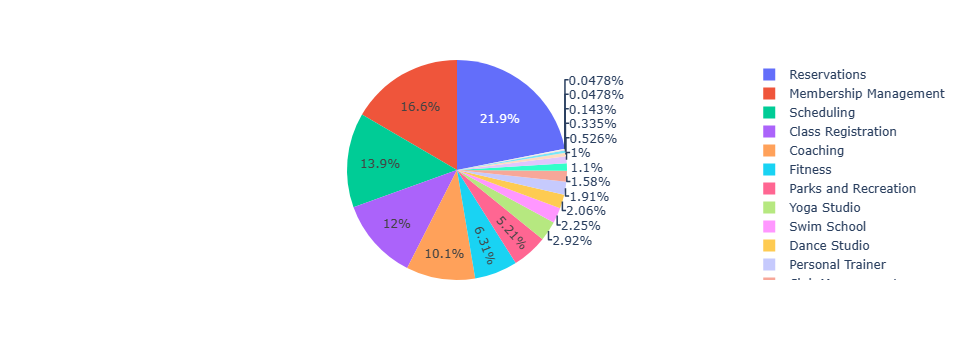

In [8]:
px.pie(data_frame=cat,values=cat.values,names=cat.index)

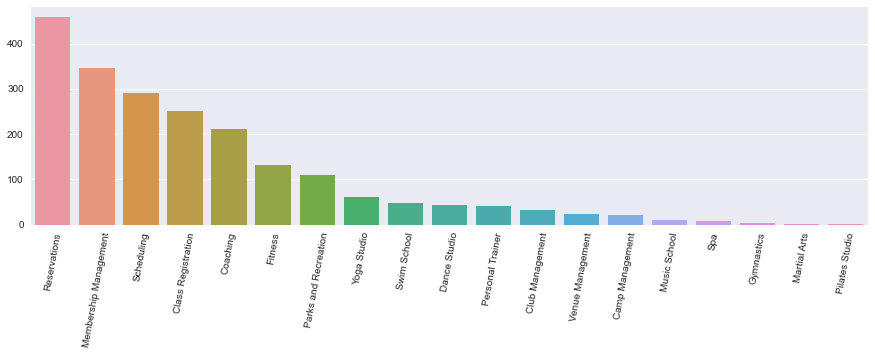

In [9]:
fig, ax = plt.subplots(1,1, figsize = (15, 4))
sns.barplot(x = cat.index, y = cat.values)
plt.xticks(rotation = 80);

In [10]:
num = site_data.groupby("Categories")["Clicks"].sum()

In [11]:
num = num.sort_values(ascending=False)

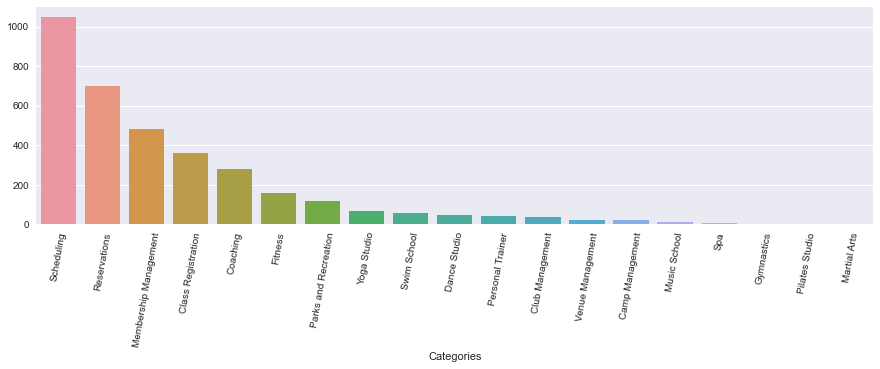

In [12]:
fig, ax = plt.subplots(1,1, figsize = (15, 4))
sns.barplot(x = num.index, y = num.values)
plt.xticks(rotation = 80);

In [13]:
cat.corr(num)

0.8746803549500856

Text(1000, -0.3, '75th percentile: $12.25')

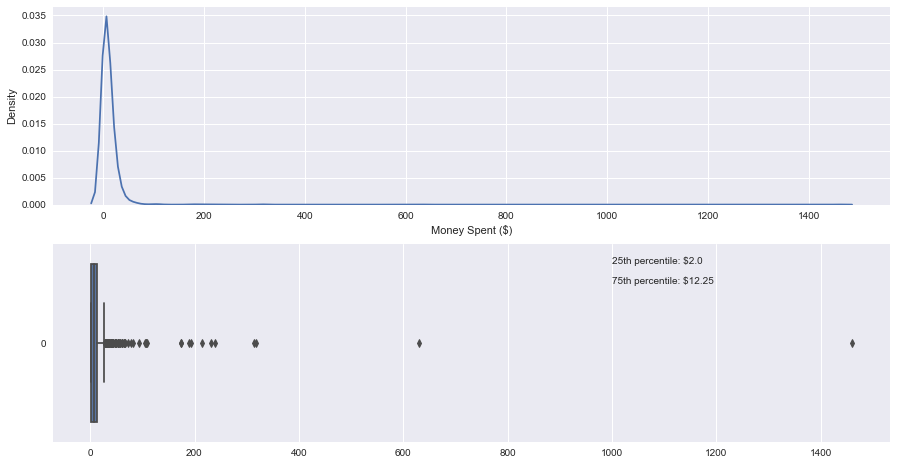

In [14]:
fig, ax = plt.subplots(2,1, figsize = (15, 8))
sns.boxplot(site_data['Money Spent ($)'], orient='h', ax = ax[1])
sns.kdeplot(site_data['Money Spent ($)'], ax = ax[0])
ax[1].text(x = 1000, y = -0.4, s = f"25th percentile: ${site_data['Money Spent ($)'].quantile(0.25)}")
ax[1].text(x = 1000, y = -0.3, s = f"75th percentile: ${site_data['Money Spent ($)'].quantile(0.75)}")

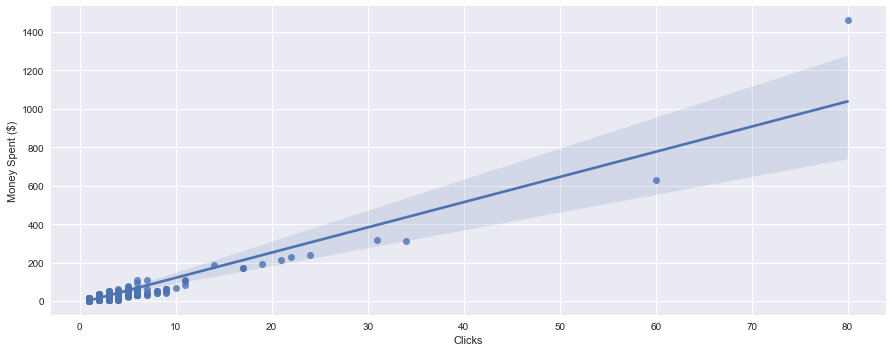

In [15]:
# fig, ax = plt.subplots(1,1, figsize = (15, 8))
sns.lmplot(data = site_data,y = 'Money Spent ($)',x = "Clicks", height = 5, aspect = 2.5)

In [16]:
site_data['Location'] = site_data["Location"].apply(lambda x :x.upper())
site_data['Location']

0        UNITED STATES
1       UNITED KINGDOM
2            SINGAPORE
3        UNITED STATES
4            AUSTRALIA
             ...      
2086     UNITED STATES
2087    UNITED KINGDOM
2088     UNITED STATES
2089    UNITED KINGDOM
2090            CANADA
Name: Location, Length: 2091, dtype: object

In [17]:
site_data['Location'] = site_data["Location"].replace({'UNITED STATES': 'USA','UNITED KINGDOM': 'UK','US':'USA'})

In [18]:
code = ['us', 'gb', 'sg', 'au', 'ca', 'sa']

In [19]:
country = site_data['Location'].value_counts()
country

USA            982
UK             416
SINGAPORE      256
AUSTRALIA      225
CANADA         211
MIDDLE EAST      1
Name: Location, dtype: int64

In [20]:
import pygal
from pygal.style import Style
custom_style = Style( colors = ('#FF0000' , '#0000FF' ,
                                '#00FF00' , '#000000',
                                '#FFD700' ,  "#ff3800"))
worldmap =  pygal.maps.world.World(style  = custom_style)
# worldmap =  pygal.maps.World()
worldmap.title = 'Countries'
cnt = 0
for i, j in country.to_dict().items():
    worldmap.add(f"{i}:{j}", {code[cnt]: j})
    cnt +=1
worldmap.render_to_file('abc1.svg')

In [21]:
site_data_ch = site_data.Channel.value_counts()
site_data_ch

Capterra           1211
GetApp              825
Software Advice      55
Name: Channel, dtype: int64

<AxesSubplot: >

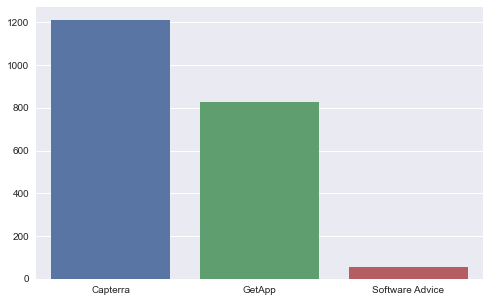

In [22]:
fig, ax = plt.subplots(1,1, figsize = (8, 5))
sns.barplot(x = site_data_ch.index, y = site_data_ch.values)

In [23]:
site_data["Paid"] = site_data["Paid"].replace(np.nan,0)
site_data["Paid"] = site_data['Paid'].apply(lambda x:int("".join([i for i in str(x) if i not in string.punctuation])))

In [24]:
site_data.head()

Product Name          Categories Date of Report  Average Position  Clicks  \
0       Omnify            Coaching     2020-10-20              13.0     1.0   
1       Omnify        Dance Studio     2020-10-20              20.0     1.0   
2       Omnify    Personal Trainer     2020-10-20               6.0     1.0   
3       Omnify          Scheduling     2020-10-20              59.0     1.0   
4       Omnify  Class Registration     2020-10-21               6.0     1.0   

   Leads  Money Spent ($)   Channel   Location  Prospects  Paid Paid Date  
0    NaN              2.0  Capterra        USA        NaN     0       NaT  
1    NaN              2.0  Capterra         UK        NaN     0       NaT  
2    NaN              2.0  Capterra  SINGAPORE        NaN     0       NaT  
3    NaN              2.0    GetApp        USA        NaN     0       NaT  
4    NaN              2.0  Capterra  AUSTRALIA        NaN     0       NaT

In [25]:
site_data["Returns"] = site_data["Paid"]/site_data["Money Spent ($)"] 
# site_data["Returns %"] = (site_data["Returns"]/site_data["Money Spent ($)"])*100
site_data.head(10)

Product Name          Categories Date of Report  Average Position  Clicks  \
0       Omnify            Coaching     2020-10-20              13.0     1.0   
1       Omnify        Dance Studio     2020-10-20              20.0     1.0   
2       Omnify    Personal Trainer     2020-10-20               6.0     1.0   
3       Omnify          Scheduling     2020-10-20              59.0     1.0   
4       Omnify  Class Registration     2020-10-21               6.0     1.0   
5       Omnify  Class Registration     2020-10-21              16.0     1.0   
6       Omnify             Fitness     2020-10-21              18.0     1.0   
7       Omnify    Personal Trainer     2020-10-21              24.0     1.0   
8       Omnify          Scheduling     2020-10-21              47.0     1.0   
9       Omnify         Swim School     2020-10-21               8.0     1.0   

   Leads  Money Spent ($)   Channel   Location  Prospects  Paid Paid Date  \
0    NaN              2.0  Capterra        USA        NaN     0       NaT   
1    NaN              2.0  Capterra         UK        NaN     0       NaT   
2    NaN              2.0  Capterra  SINGAPORE        NaN     0       NaT   
3    NaN              2.0    GetApp        USA        NaN     0       NaT   
4    NaN              2.0  Capterra  AUSTRALIA        NaN     0       NaT   
5    NaN              2.0  Capterra        USA        NaN     0       NaT   
6    NaN              2.0  Capterra         UK        NaN     0       NaT   
7    NaN              2.0    GetApp     CANADA        NaN     0       NaT   
8    NaN              2.0    GetApp     CANADA        NaN     0       NaT   
9    NaN              2.0  Capterra        USA        NaN     0       NaT   

   Returns  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
5      0.0  
6      0.0  
7      0.0  
8      0.0  
9      0.0

In [26]:
most_profit_channel = (site_data.groupby("Channel")["Returns"].sum()).sort_values()
most_profit_channel

Channel
GetApp              170.285714
Software Advice     448.500000
Capterra           3196.788549
Name: Returns, dtype: float64

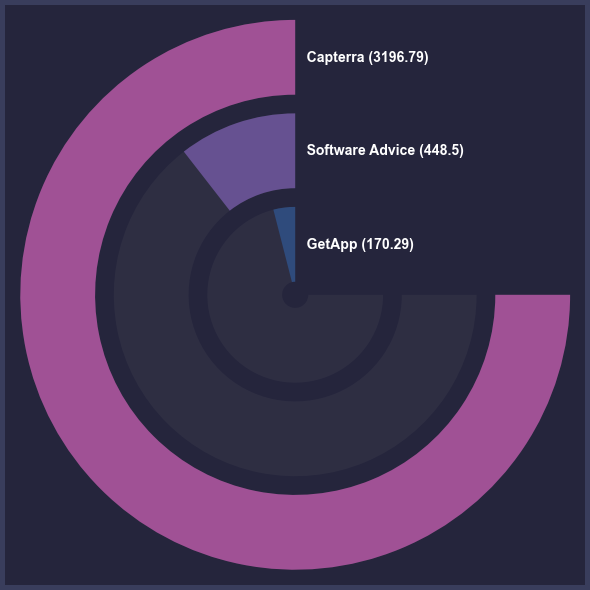

In [27]:
lith_dict = {'LITH': most_profit_channel.index,
             'COUNT': np.round(most_profit_channel.values,2)}

df = pd.DataFrame.from_dict(lith_dict)

# Get key properties for colours and labels
max_value_full_ring = max(df['COUNT'])

ring_colours = ['#2f4b7c', '#665191', '#a05195','#d45087',
               '#f95d6a','#ff7c43','#ffa600']

ring_labels = [f'   {x} ({v}) ' for x, v in zip(list(df['LITH']), 
                                                 list(df['COUNT']))]
data_len = len(df)

# Begin creating the figure
fig = plt.figure(figsize=(10,10), linewidth=10,
                 edgecolor='#393d5c', 
                 facecolor='#25253c')

rect = [0.1,0.1,0.8,0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey
# ring to create the background for each one
for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring*1.5*np.pi/max_value_full_ring, 
                     color='grey', 
                     alpha=0.1)
# Hide all axis items
ax_polar_bg.axis('off')
    
# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2], 
                    labels=ring_labels, 
                    angle=0, 
                    fontsize=14, fontweight='bold',
                    color='white', verticalalignment='center')

# Loop through each entry in the dataframe and create a coloured 
# ring for each entry
for i in range(data_len):
    ax_polar.barh(i, list(df['COUNT'])[i]*1.5*np.pi/max_value_full_ring, 
                  color=ring_colours[i])


# Hide all grid elements for the    
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=False, bottom=False, 
                   labelbottom=False, labelleft=True)

plt.show()

In [28]:
pivot_table = pd.pivot_table(data = site_data,columns="Location",index="Channel",values = "Returns",aggfunc="sum")
pivot_table

Location         AUSTRALIA      CANADA  MIDDLE EAST   SINGAPORE          UK  \
Channel                                                                       
Capterra               0.0  298.678733          0.0  162.545455  459.025641   
GetApp                 0.0    0.000000          NaN    0.000000    0.000000   
Software Advice        0.0    0.000000          NaN    0.000000    0.000000   

Location                 USA  
Channel                       
Capterra         2276.538721  
GetApp            170.285714  
Software Advice   448.500000

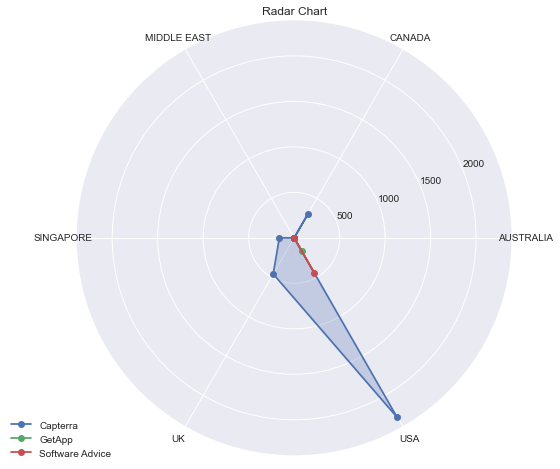

In [29]:
num_vars = len(pivot_table.columns)

# Plot the radar chart
angles = [n / float(num_vars) * 2 * 3.14 for n in range(num_vars)]
angles += angles[:1]  # Complete the circle

# Initialize the plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot each category's values as a line on the radar chart
for index, row in pivot_table.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]  # Connect the last point to the first point
    ax.plot(angles, values, marker='o', label=index)
    ax.fill(angles, values, alpha=0.25)

# Set the labels for each variable (Metric1, Metric2, ...)
ax.set_thetagrids([angle * 180 / 3.14 for angle in angles[:-1]], pivot_table.columns)

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.title('Radar Chart')
plt.show()

<AxesSubplot: xlabel='Location'>

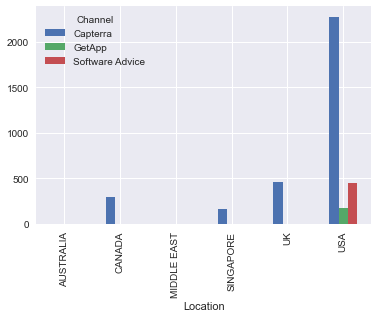

In [30]:
pivot_table.T.plot(kind = "bar")

In [31]:
index = site_data.set_index("Date of Report")
index

Product Name          Categories  Average Position  Clicks  \
Date of Report                                                              
2020-10-20           Omnify            Coaching             13.00     1.0   
2020-10-20           Omnify        Dance Studio             20.00     1.0   
2020-10-20           Omnify    Personal Trainer              6.00     1.0   
2020-10-20           Omnify          Scheduling             59.00     1.0   
2020-10-21           Omnify  Class Registration              6.00     1.0   
...                     ...                 ...               ...     ...   
2021-04-30           Omnify  Class Registration             10.00     1.0   
2021-04-30           Omnify     Club Management              1.00     1.0   
2021-04-30           Omnify            Coaching             14.67     3.0   
2021-04-30           Omnify        Dance Studio              8.00     1.0   
2021-04-30           Omnify             Fitness              8.00     1.0   

                Leads  Money Spent ($)          Channel   Location  Prospects  \
Date of Report                                                                  
2020-10-20        NaN             2.00         Capterra        USA        NaN   
2020-10-20        NaN             2.00         Capterra         UK        NaN   
2020-10-20        NaN             2.00         Capterra  SINGAPORE        NaN   
2020-10-20        NaN             2.00           GetApp        USA        NaN   
2020-10-21        NaN             2.00         Capterra  AUSTRALIA        NaN   
...               ...              ...              ...        ...        ...   
2021-04-30        NaN            10.75         Capterra        USA        NaN   
2021-04-30        NaN            12.25  Software Advice         UK        NaN   
2021-04-30        NaN             6.00         Capterra        USA        NaN   
2021-04-30        NaN            11.50         Capterra         UK        NaN   
2021-04-30        NaN            11.25         Capterra     CANADA        NaN   

                Paid Paid Date  Returns  
Date of Report                           
2020-10-20         0       NaT      0.0  
2020-10-20         0       NaT      0.0  
2020-10-20         0       NaT      0.0  
2020-10-20         0       NaT      0.0  
2020-10-21         0       NaT      0.0  
...              ...       ...      ...  
2021-04-30         0       NaT      0.0  
2021-04-30         0       NaT      0.0  
2021-04-30         0       NaT      0.0  
2021-04-30         0       NaT      0.0  
2021-04-30         0       NaT      0.0  

[2091 rows x 12 columns]

In [32]:
weekly =  index.resample("W").sum()
weekly

Average Position  Clicks  Leads  Money Spent ($)  Prospects  \
Date of Report                                                                
2020-10-25                635.00    42.0    0.0            84.00        0.0   
2020-11-01               1270.17   103.0    0.0           373.00        0.0   
2020-11-08               1046.34    92.0    5.0           679.75        4.0   
2020-11-15               1318.00   241.0    3.0          2608.25        0.0   
2020-11-22               1374.67   119.0    2.0           443.75        0.0   
2020-11-29                381.29    64.0    1.0           503.50        1.0   
2020-12-06                526.66    90.0    4.0           699.50        0.0   
2020-12-13                509.17   125.0    6.0           973.60        3.0   
2020-12-20                635.83   112.0    4.0           887.20        3.0   
2020-12-27                588.79   162.0    5.0          1292.60        3.0   
2021-01-03                693.51   138.0    4.0          1034.40        2.0   
2021-01-10                781.25   155.0    3.0          1120.25        0.0   
2021-01-17                735.96   202.0   14.0          1513.75        7.0   
2021-01-24                733.43   185.0   15.0          1419.25        3.0   
2021-01-31                962.42    80.0    4.0           386.00        2.0   
2021-02-07               1053.47   179.0   11.0          1243.00        4.0   
2021-02-14                909.86   211.0   18.0          1675.25        1.0   
2021-02-21                767.89   161.0    9.0          1103.00        5.0   
2021-02-28                863.54   118.0    6.0           628.15        1.0   
2021-03-07                910.50   116.0   10.0           702.25        7.0   
2021-03-14                805.05   121.0   14.0           793.25        5.0   
2021-03-21                808.83   102.0    7.0           675.35        4.0   
2021-03-28                902.25    89.0    7.0           662.20        0.0   
2021-04-04                293.51    56.0    1.0           473.75        1.0   
2021-04-11                  0.00     0.0    0.0             0.00        0.0   
2021-04-18                754.33    89.0    7.0           619.75        3.0   
2021-04-25                809.45    95.0    4.0           602.25        1.0   
2021-05-02                360.22   101.0    8.0           919.25        2.0   
2021-05-09                 51.50    11.0    1.0           113.00        1.0   
2021-05-16                  0.00     0.0    0.0             0.00        0.0   
2021-05-23                  0.00     0.0    0.0             0.00        0.0   
2021-05-30                  0.00     0.0    0.0             0.00        0.0   
2021-06-06                145.67    22.0    2.0           199.75        0.0   
2021-06-13                  0.00     0.0    0.0             0.00        0.0   
2021-06-20                  0.00     0.0    0.0             0.00        0.0   
2021-06-27                  0.00     0.0    0.0             0.00        0.0   
2021-07-04                104.00    16.0    1.0           133.25        0.0   
2021-07-11                  0.00     0.0    0.0             0.00        0.0   
2021-07-18                  0.00     0.0    0.0             0.00        0.0   
2021-07-25                  0.00     0.0    0.0             0.00        0.0   
2021-08-01                  0.00     0.0    0.0             0.00        0.0   
2021-08-08                165.00    19.0    4.0           139.25        4.0   
2021-08-15                  0.00     0.0    0.0             0.00        0.0   
2021-08-22                  0.00     0.0    0.0             0.00        0.0   
2021-08-29                  0.00     0.0    0.0             0.00        0.0   
2021-09-05                112.00    13.0    1.0           120.50        0.0   
2021-09-12                  0.00     0.0    0.0             0.00        0.0   
2021-09-19                  0.00     0.0    0.0             0.00        0.0   
2021-09-26                  0.00     0.0    0.0             0.00  

In [33]:
weekly["Returns"] = (weekly["Paid"]/weekly["Money Spent ($)"])*100
weekly

Average Position  Clicks  Leads  Money Spent ($)  Prospects  \
Date of Report                                                                
2020-10-25                635.00    42.0    0.0            84.00        0.0   
2020-11-01               1270.17   103.0    0.0           373.00        0.0   
2020-11-08               1046.34    92.0    5.0           679.75        4.0   
2020-11-15               1318.00   241.0    3.0          2608.25        0.0   
2020-11-22               1374.67   119.0    2.0           443.75        0.0   
2020-11-29                381.29    64.0    1.0           503.50        1.0   
2020-12-06                526.66    90.0    4.0           699.50        0.0   
2020-12-13                509.17   125.0    6.0           973.60        3.0   
2020-12-20                635.83   112.0    4.0           887.20        3.0   
2020-12-27                588.79   162.0    5.0          1292.60        3.0   
2021-01-03                693.51   138.0    4.0          1034.40        2.0   
2021-01-10                781.25   155.0    3.0          1120.25        0.0   
2021-01-17                735.96   202.0   14.0          1513.75        7.0   
2021-01-24                733.43   185.0   15.0          1419.25        3.0   
2021-01-31                962.42    80.0    4.0           386.00        2.0   
2021-02-07               1053.47   179.0   11.0          1243.00        4.0   
2021-02-14                909.86   211.0   18.0          1675.25        1.0   
2021-02-21                767.89   161.0    9.0          1103.00        5.0   
2021-02-28                863.54   118.0    6.0           628.15        1.0   
2021-03-07                910.50   116.0   10.0           702.25        7.0   
2021-03-14                805.05   121.0   14.0           793.25        5.0   
2021-03-21                808.83   102.0    7.0           675.35        4.0   
2021-03-28                902.25    89.0    7.0           662.20        0.0   
2021-04-04                293.51    56.0    1.0           473.75        1.0   
2021-04-11                  0.00     0.0    0.0             0.00        0.0   
2021-04-18                754.33    89.0    7.0           619.75        3.0   
2021-04-25                809.45    95.0    4.0           602.25        1.0   
2021-05-02                360.22   101.0    8.0           919.25        2.0   
2021-05-09                 51.50    11.0    1.0           113.00        1.0   
2021-05-16                  0.00     0.0    0.0             0.00        0.0   
2021-05-23                  0.00     0.0    0.0             0.00        0.0   
2021-05-30                  0.00     0.0    0.0             0.00        0.0   
2021-06-06                145.67    22.0    2.0           199.75        0.0   
2021-06-13                  0.00     0.0    0.0             0.00        0.0   
2021-06-20                  0.00     0.0    0.0             0.00        0.0   
2021-06-27                  0.00     0.0    0.0             0.00        0.0   
2021-07-04                104.00    16.0    1.0           133.25        0.0   
2021-07-11                  0.00     0.0    0.0             0.00        0.0   
2021-07-18                  0.00     0.0    0.0             0.00        0.0   
2021-07-25                  0.00     0.0    0.0             0.00        0.0   
2021-08-01                  0.00     0.0    0.0             0.00        0.0   
2021-08-08                165.00    19.0    4.0           139.25        4.0   
2021-08-15                  0.00     0.0    0.0             0.00        0.0   
2021-08-22                  0.00     0.0    0.0             0.00        0.0   
2021-08-29                  0.00     0.0    0.0             0.00        0.0   
2021-09-05                112.00    13.0    1.0           120.50        0.0   
2021-09-12                  0.00     0.0    0.0             0.00        0.0   
2021-09-19                  0.00     0.0    0.0             0.00        0.0   
2021-09-26                  0.00     0.0    0.0             0.00  

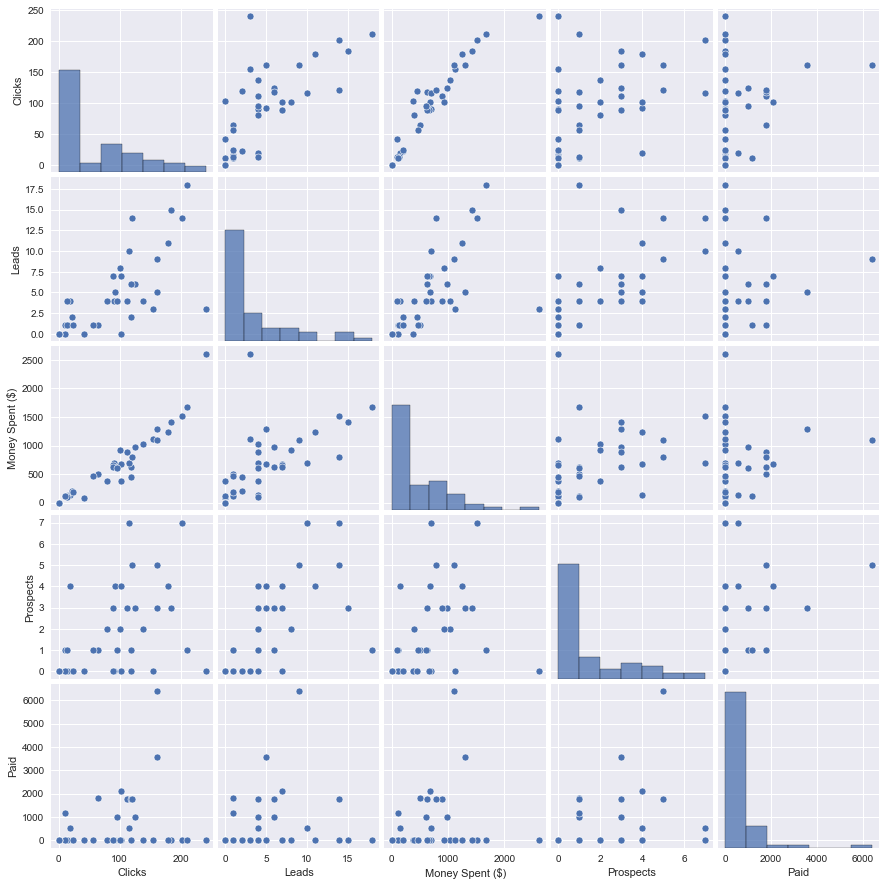

In [34]:
sns.pairplot(weekly[["Clicks","Leads","Money Spent ($)","Prospects","Paid"]])

<AxesSubplot: xlabel='Date of Report'>

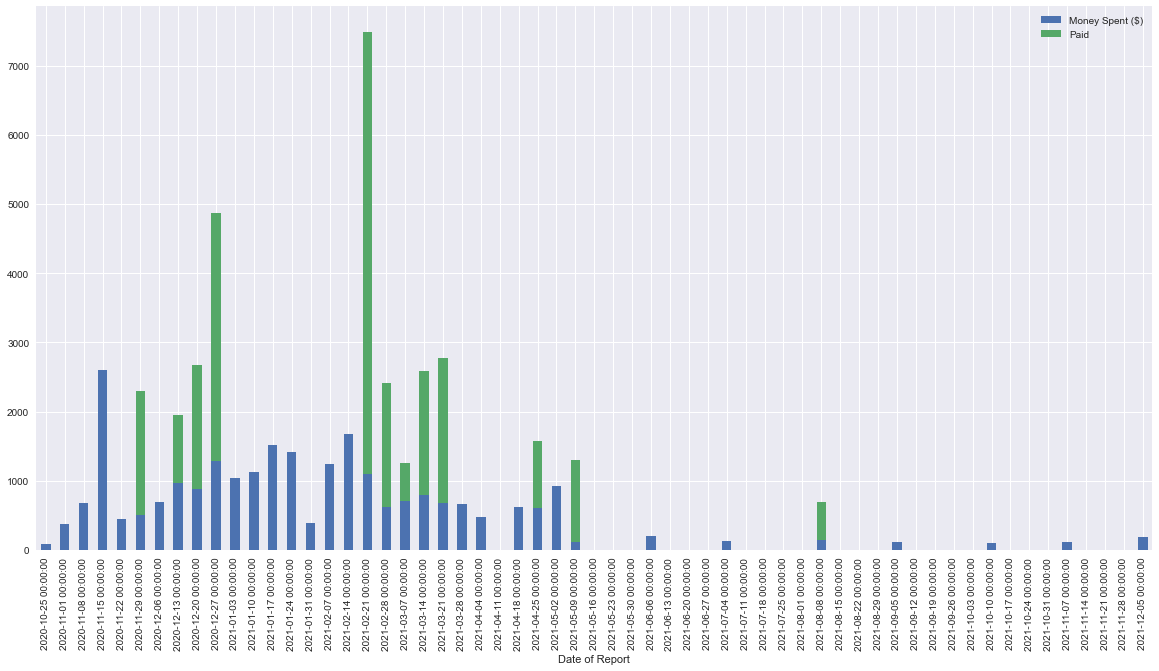

In [35]:
weekly[["Money Spent ($)","Paid"]].plot(kind = "bar",stacked = True,figsize = (20,10))

In [36]:
monthly =  index.resample("M").sum()
monthly["Returns"] = (monthly["Paid"]/monthly["Money Spent ($)"])*100
monthly

Average Position  Clicks  Leads  Money Spent ($)  Prospects  \
Date of Report                                                                
2020-10-31               1806.17   134.0    0.0           411.50        0.0   
2020-11-30               4303.13   548.0   12.0          4445.25        5.0   
2020-12-31               2607.63   557.0   22.0          4361.30       11.0   
2021-01-31               3475.56   671.0   36.0          4800.75       12.0   
2021-02-28               3594.76   669.0   44.0          4649.40       11.0   
2021-03-31               3701.47   476.0   39.0          3245.55       17.0   
2021-04-30               1942.67   293.0   19.0          2202.50        6.0   
2021-05-31                 51.50    11.0    1.0           113.00        1.0   
2021-06-30                145.67    22.0    2.0           199.75        0.0   
2021-07-31                104.00    16.0    1.0           133.25        0.0   
2021-08-31                165.00    19.0    4.0           139.25        4.0   
2021-09-30                112.00    13.0    1.0           120.50        0.0   
2021-10-31                124.00    13.0    4.0            94.75        1.0   
2021-11-30                 40.00    11.0    0.0           114.50        0.0   
2021-12-31                255.20    24.0    1.0           192.00        0.0   

                Paid      Returns  
Date of Report                     
2020-10-31         0     0.000000  
2020-11-30      1794    40.357685  
2020-12-31      6344   145.461216  
2021-01-31         0     0.000000  
2021-02-28      8168   175.678582  
2021-03-31      4437   136.710265  
2021-04-30       980    44.494892  
2021-05-31      1188  1051.327434  
2021-06-30         0     0.000000  
2021-07-31         0     0.000000  
2021-08-31       549   394.254937  
2021-09-30         0     0.000000  
2021-10-31         0     0.000000  
2021-11-30         0     0.000000  
2021-12-31         0     0.000000

<AxesSubplot: xlabel='Date of Report'>

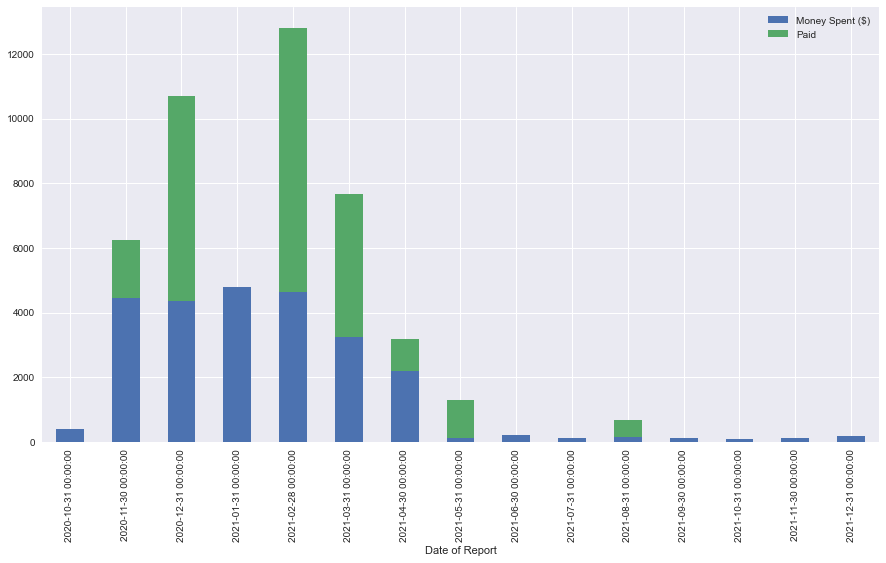

In [37]:
monthly[["Money Spent ($)","Paid"]].plot(kind = "bar",stacked = True,figsize=(15,8))

In [38]:
profit_cat = site_data.groupby('Categories')['Returns'].sum()

In [39]:
filter_profit_cat = profit_cat.drop(profit_cat[profit_cat == 0].index)
filter_profit_cat

Categories
Class Registration        637.263885
Fitness                   105.600000
Membership Management     183.384615
Parks and Recreation     2000.000000
Reservations              260.936877
Scheduling                628.388886
Name: Returns, dtype: float64

[0.         1.04719755 2.0943951  3.14159265 4.1887902  5.23598776
 0.        ]
[ 637.26388509  105.6         183.38461538 2000.          260.93687708
  628.3888861   637.26388509]


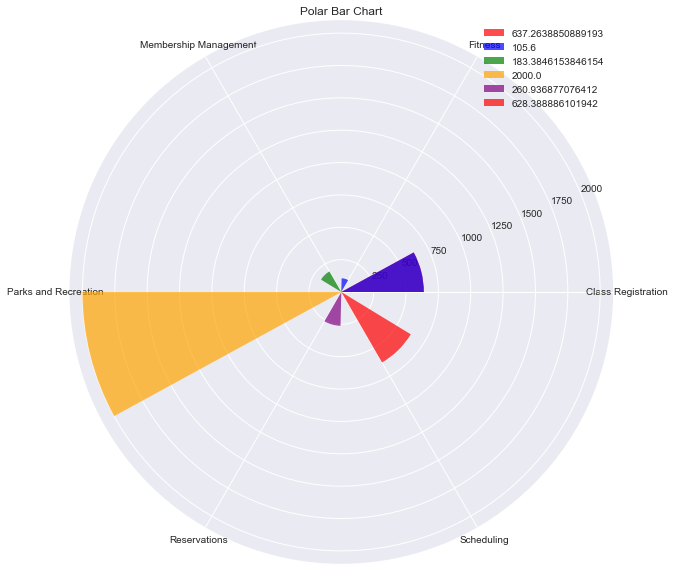

In [40]:
theta = np.linspace(0, 2 * np.pi, len(filter_profit_cat.index), endpoint=False)
radii = filter_profit_cat.values
custom_colors = ['red', 'blue', 'green', 'orange', 'purple']

# Make the plot circular
theta = np.concatenate((theta, [theta[0]]))
radii = np.concatenate((radii, [radii[0]]))
print(theta)
print(radii)
# Create the figure and axes
fig, ax = plt.subplots(figsize = (15,10),subplot_kw={'projection': 'polar'})

# Plot the polar bar chart
bars = ax.bar(theta, radii, width=0.5, align='edge', alpha=0.7,color=custom_colors)

# Set the labels for each bar
ax.set_xticks(theta[:-1])
ax.set_xticklabels(filter_profit_cat.index)

# Set the title
ax.set_title("Polar Bar Chart")

# Display the plot
ax.legend(bars, filter_profit_cat)

In [41]:
site_data.head()

Product Name          Categories Date of Report  Average Position  Clicks  \
0       Omnify            Coaching     2020-10-20              13.0     1.0   
1       Omnify        Dance Studio     2020-10-20              20.0     1.0   
2       Omnify    Personal Trainer     2020-10-20               6.0     1.0   
3       Omnify          Scheduling     2020-10-20              59.0     1.0   
4       Omnify  Class Registration     2020-10-21               6.0     1.0   

   Leads  Money Spent ($)   Channel   Location  Prospects  Paid Paid Date  \
0    NaN              2.0  Capterra        USA        NaN     0       NaT   
1    NaN              2.0  Capterra         UK        NaN     0       NaT   
2    NaN              2.0  Capterra  SINGAPORE        NaN     0       NaT   
3    NaN              2.0    GetApp        USA        NaN     0       NaT   
4    NaN              2.0  Capterra  AUSTRALIA        NaN     0       NaT   

   Returns  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0

In [42]:
Daily = site_data.groupby("Date of Report")["Clicks"].sum()

<AxesSubplot: xlabel='Date of Report', ylabel='Clicks'>

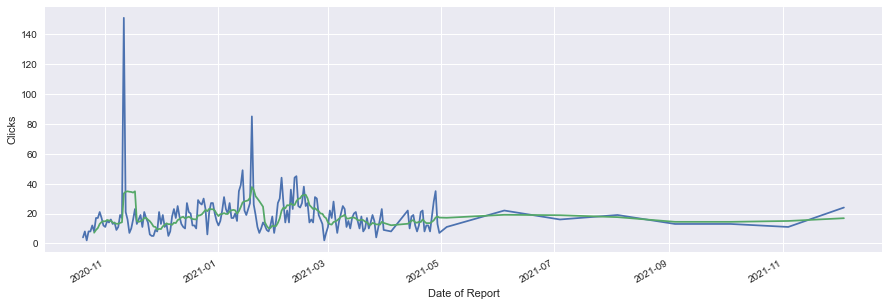

In [43]:
plt.figure(figsize = (15,5))
sns.lineplot(Daily)
(Daily.rolling(7).mean()).plot()

In [44]:
Daily.rolling(7).sum()

Date of Report
2020-10-20      NaN
2020-10-21      NaN
2020-10-22      NaN
2020-10-23      NaN
2020-10-24      NaN
              ...  
2021-08-04    123.0
2021-09-04    101.0
2021-10-04    101.0
2021-11-04    105.0
2021-12-04    118.0
Name: Clicks, Length: 190, dtype: float64

In [45]:
Da_USA = site_data.loc[site_data["Location"] == "USA",:]
Daily_USA = Da_USA.groupby("Date of Report")["Clicks"].sum()

<AxesSubplot: xlabel='Date of Report', ylabel='Clicks'>

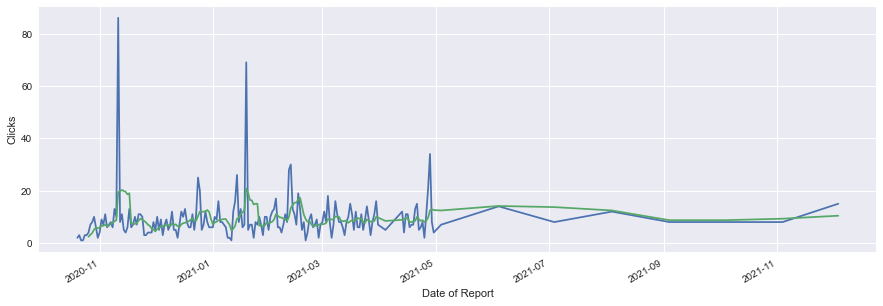

In [46]:
plt.figure(figsize = (15,5))
sns.lineplot(Daily_USA)
(Daily_USA.rolling(7).mean()).plot()

In [47]:
Daily_USA.nlargest(3)

Date of Report
2020-11-11    86.0
2021-01-19    69.0
2021-04-28    34.0
Name: Clicks, dtype: float64

<AxesSubplot: xlabel='Date of Report'>

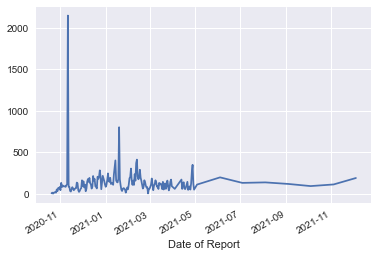

In [48]:
Daily_spends = site_data.groupby("Date of Report")["Money Spent ($)"].sum()
Daily_spends.plot()

In [49]:
site_data.loc[~site_data["Prospects"].isna()]

Product Name             Categories Date of Report  Average Position  \
131        Omnify           Reservations     2020-11-02             10.00   
172        Omnify           Reservations     2020-11-06              6.00   
185        Omnify           Reservations     2020-11-07              1.00   
195        Omnify        Club Management     2020-11-08              1.00   
390        Omnify     Class Registration     2020-11-23              1.00   
...           ...                    ...            ...               ...   
1926       Omnify  Membership Management     2021-04-13             25.00   
1968       Omnify                Fitness     2021-04-17              7.00   
2006       Omnify     Class Registration     2021-04-21              6.29   
2052       Omnify     Class Registration     2021-04-26              9.40   
2076       Omnify             Scheduling     2021-04-28              7.32   

      Clicks  Leads  Money Spent ($)          Channel     Location  Prospects  \
131      1.0    1.0             2.00           GetApp    SINGAPORE        1.0   
172      2.0    1.0            30.00         Capterra          USA        1.0   
185      1.0    1.0            15.00         Capterra          USA        1.0   
195      1.0    1.0              NaN         Capterra  MIDDLE EAST        1.0   
390      1.0    1.0             4.00  Software Advice          USA        1.0   
...      ...    ...              ...              ...          ...        ...   
1926     2.0    1.0            20.50         Capterra          USA        1.0   
1968     1.0    1.0             8.25         Capterra       CANADA        1.0   
2006     7.0    1.0            43.75         Capterra          USA        1.0   
2052     5.0    1.0            31.25         Capterra          USA        1.0   
2076    31.0    2.0           317.75         Capterra          USA        1.0   

      Paid  Paid Date  Returns  
131      0        NaT      0.0  
172      0        NaT      0.0  
185      0        NaT      0.0  
195      0        NaT      NaN  
390   1794 2020-12-02    448.5  
...    ...        ...      ...  
1926     0        NaT      0.0  
1968     0        NaT      0.0  
2006   980 2021-04-27     22.4  
2052     0        NaT      0.0  
2076     0        NaT      0.0  

[66 rows x 13 columns]

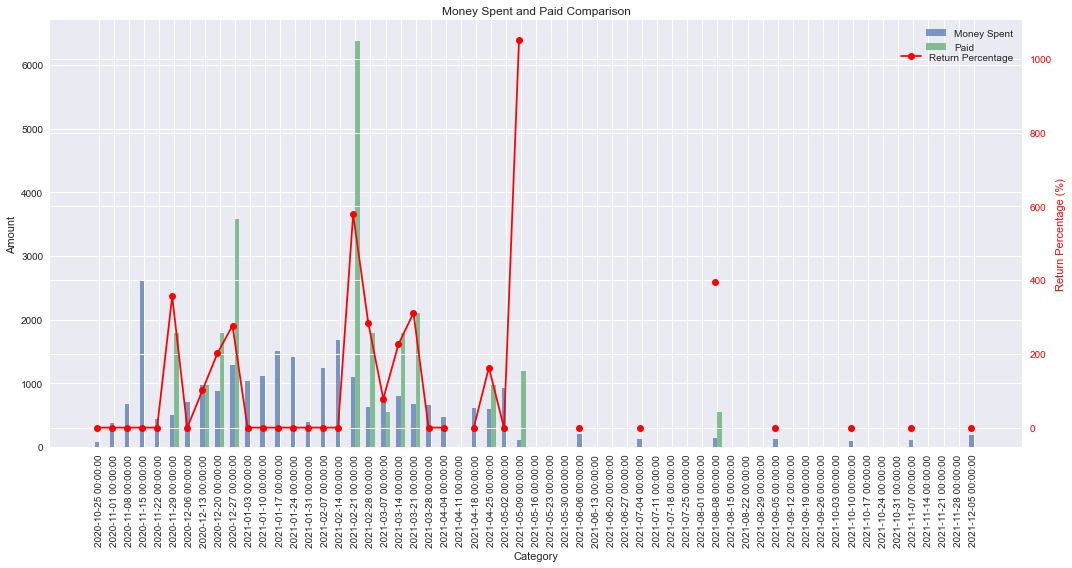

In [50]:
data = {
    'Category': weekly.index,
    'Money Spent': weekly["Money Spent ($)"],
    'Paid': weekly["Paid"],
    'Return Percentage': weekly["Returns"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create the grouped bar chart
fig, ax1 = plt.subplots(figsize = (15,8))

x = range(len(df['Category']))
width = 0.3

ax1.bar(x, df['Money Spent'], width, label='Money Spent', alpha=0.7)
ax1.bar([pos + width for pos in x], df['Paid'], width, label='Paid', alpha=0.7)

ax1.set_xticks([pos + width / 2 for pos in x])
plt.xticks(rotation = 90)
ax1.set_xticklabels(df['Category'])
ax1.set_xlabel('Category')
ax1.set_ylabel('Amount')
ax1.set_title('Money Spent and Paid Comparison')
ax1.legend()

# Create the line plot for Return Percentage on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(x, df['Return Percentage'], color='red', marker='o', label='Return Percentage')
ax2.set_ylabel('Return Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(bbox_to_anchor=(1,0.945))

plt.tight_layout()
plt.show()

In [51]:
google_data.head()

Week                  Campaign                            Ad group  \
0 2021-01-25       EK_Generic_Swimming       Pool_Reservation_System_Exact   
1 2021-01-25       EK_Generic_Swimming              Pool_Booking_App_Exact   
2 2021-01-25  EK_Generic_Quad-Tok_Yoga  Yoga_Studio_Booking_Software_Broad   
3 2021-01-25       EK_Generic_Swimming     Pool_Scheduling_Software_Phrase   
4 2021-01-25    EK_Generic_Swimming_UK     Pool_Reservation_Software_Broad   

  Keyword type                Search Keyword Currency  Clicks  Impressions  \
0        Exact       pool reservation system      USD       2           17   
1        Exact              pool booking app      USD       1           13   
2        Broad  yoga studio booking software      USD       4          154   
3       Phrase      pool scheduling software      USD       2            8   
4        Broad     pool reservation software      USD       2           13   

   Cost ($)  Leads  Prospects Payment ($) Payment Date Country  
0     38.33      0          1        $980   2021-02-03     USA  
1     11.70      0          0         NaN          NaT     USA  
2     45.13      0          1      $1,188   2021-03-13     USA  
3     23.91      0          0         NaN          NaT     USA  
4      4.89      0          0         NaN          NaT     USA

In [52]:
google_data["Search Keyword"].value_counts()

reservation management system         90
pool reservation software             63
booking management software           50
yoga studio booking software          39
swimming pool booking system          21
pool scheduling software              20
swimming pool reservation system      17
pool reservation system               16
yoga studio management software       15
pilates studio software               15
yoga studio app                       13
yoga studio software                  12
pilates studio management software    11
pool booking app                      11
pilates studio booking software        8
pilates booking system                 6
yoga studio scheduling software        2
=+pool +reservation software           1
pilates management software            1
pilates studio software manager        1
Name: Search Keyword, dtype: int64

In [53]:
google_data["Payment ($)"] = google_data["Payment ($)"].replace(np.nan,0)
google_data["Payment ($)"] = google_data["Payment ($)"].apply(lambda x:int("".join([i for i in str(x) if i not in string.punctuation])))

In [54]:
google_data.head()

Week                  Campaign                            Ad group  \
0 2021-01-25       EK_Generic_Swimming       Pool_Reservation_System_Exact   
1 2021-01-25       EK_Generic_Swimming              Pool_Booking_App_Exact   
2 2021-01-25  EK_Generic_Quad-Tok_Yoga  Yoga_Studio_Booking_Software_Broad   
3 2021-01-25       EK_Generic_Swimming     Pool_Scheduling_Software_Phrase   
4 2021-01-25    EK_Generic_Swimming_UK     Pool_Reservation_Software_Broad   

  Keyword type                Search Keyword Currency  Clicks  Impressions  \
0        Exact       pool reservation system      USD       2           17   
1        Exact              pool booking app      USD       1           13   
2        Broad  yoga studio booking software      USD       4          154   
3       Phrase      pool scheduling software      USD       2            8   
4        Broad     pool reservation software      USD       2           13   

   Cost ($)  Leads  Prospects  Payment ($) Payment Date Country  
0     38.33      0          1          980   2021-02-03     USA  
1     11.70      0          0            0          NaT     USA  
2     45.13      0          1         1188   2021-03-13     USA  
3     23.91      0          0            0          NaT     USA  
4      4.89      0          0            0          NaT     USA

In [55]:
google_data["Returns"] = google_data["Payment ($)"]/google_data["Cost ($)"] 

In [56]:
profit_keyword = google_data.groupby('Search Keyword')['Returns'].sum()
profit_keyword = profit_keyword.sort_values(ascending=False)[:5]
profit_keyword

Search Keyword
reservation management system    233.548520
pool reservation software        128.944949
yoga studio booking software      49.513731
pool reservation system           25.567441
yoga studio software              18.093207
Name: Returns, dtype: float64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'reservation management system'),
  Text(1, 0, 'pool reservation software'),
  Text(2, 0, 'yoga studio booking software'),
  Text(3, 0, 'pool reservation system'),
  Text(4, 0, 'yoga studio software')])

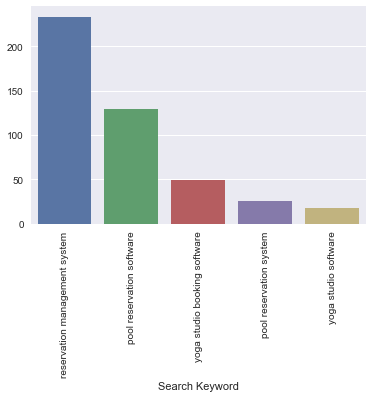

In [57]:
sns.barplot(x = profit_keyword.index,y = profit_keyword.values)
plt.xticks(rotation = 90)

In [58]:
Daily = site_data.groupby("Date of Report")["Money Spent ($)","Paid"].sum()
# Daily["returns"] = (Daily["Paid"]/Daily["Money Spent ($)"])*100

<AxesSubplot: xlabel='Date of Report'>

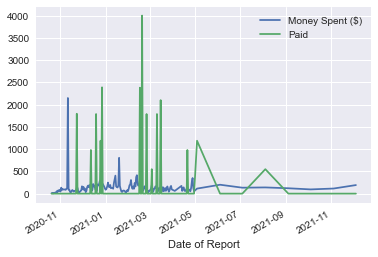

In [59]:
Daily.plot()

<AxesSubplot: ylabel='Date of Report'>

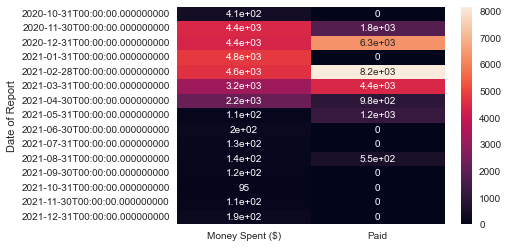

In [60]:
sns.heatmap(data = monthly[["Money Spent ($)","Paid"]],annot = True)

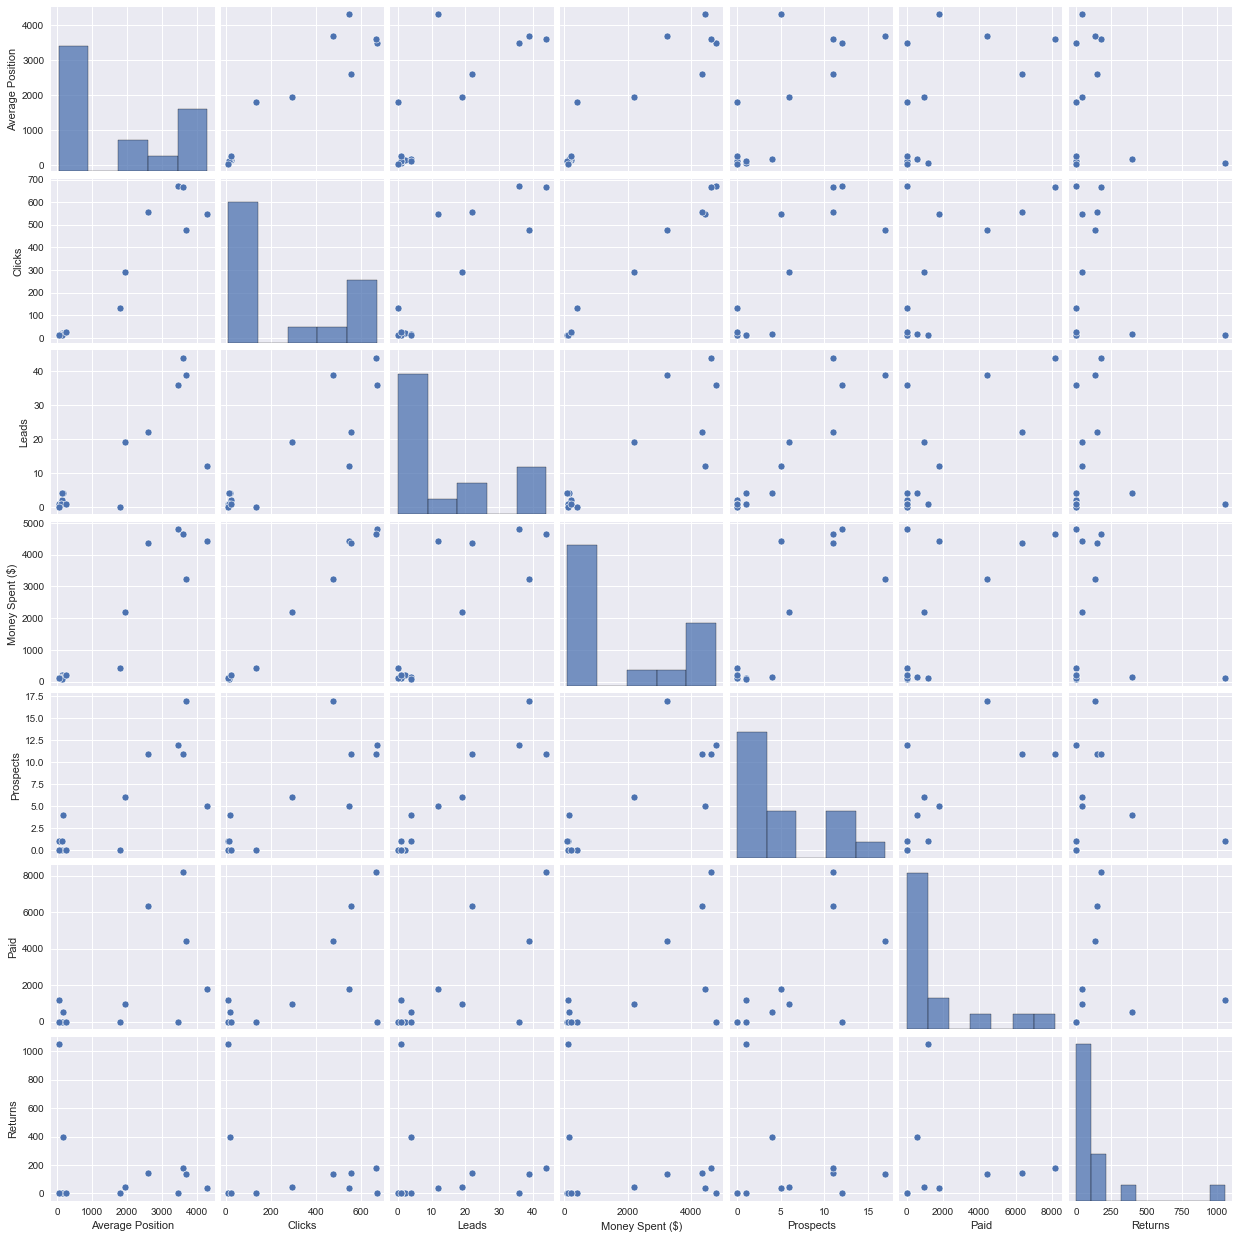

In [61]:
sns.pairplot(monthly)